 # Table of Contents
<div class="toc" style="margin-top: 1em;"><ul class="toc-item" id="toc-level0"><li><span><a href="http://localhost:8888/notebooks/projects/Naive-Bayes/Untitled.ipynb#Document/Text-Classification" data-toc-modified-id="Document/Text-Classification-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Document/Text Classification</a></span><ul class="toc-item"><li><span><a href="http://localhost:8888/notebooks/projects/Naive-Bayes/Untitled.ipynb#Loading-the-data-set" data-toc-modified-id="Loading-the-data-set-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Loading the data set</a></span></li><li><span><a href="http://localhost:8888/notebooks/projects/Naive-Bayes/Untitled.ipynb#Extracting-features-from-text-files." data-toc-modified-id="Extracting-features-from-text-files.-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Extracting features from text files.</a></span><ul class="toc-item"><li><span><a href="http://localhost:8888/notebooks/projects/Naive-Bayes/Untitled.ipynb#Extracting-features-from-the-training-data-using-a-sparse-vectorizer" data-toc-modified-id="Extracting-features-from-the-training-data-using-a-sparse-vectorizer-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Extracting features from the training data using a sparse vectorizer</a></span></li><li><span><a href="http://localhost:8888/notebooks/projects/Naive-Bayes/Untitled.ipynb#Extracting-features-from-the-test-data-using-the-same-vectorizer" data-toc-modified-id="Extracting-features-from-the-test-data-using-the-same-vectorizer-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>Extracting features from the test data using the same vectorizer</a></span></li></ul></li><li><span><a href="http://localhost:8888/notebooks/projects/Naive-Bayes/Untitled.ipynb#Training-+-Testing-Naive-Bayes-algorithm" data-toc-modified-id="Training-+-Testing-Naive-Bayes-algorithm-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Training + Testing Naive Bayes algorithm</a></span></li></ul></li></ul></div>

# Document/Text Classification

This notebook is based on Scikit-learn example for [Classification of text documents using sparse features](http://scikit-learn.org/stable/auto_examples/text/document_classification_20newsgroups.html#example-text-document-classification-20newsgroups-py).

In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import time 
%matplotlib inline
import matplotlib
matplotlib.style.use('seaborn')
import matplotlib.pyplot as plt

from sklearn import metrics

## Loading the data set

The data set used for this example is the **20 Newsgroup** data set. The original data set can be found [here](http://qwone.com/~jason/20Newsgroups/).


The 20 Newsgroups data set is a collection of approximately 20,000 newsgroup documents, partitioned (nearly) evenly across 20 different newsgroups. 

This data set is in-built in scikit, so we don’t need to download it explicitly.

In [2]:
from sklearn.datasets import fetch_20newsgroups

In [3]:
data_train = fetch_20newsgroups(subset='train', shuffle=True, random_state=42)
data_test = fetch_20newsgroups(subset='test', shuffle=True, random_state=42)

In [4]:
y_train, y_test = data_train.target, data_test.target

- Check the target names (categories) and some data files.

In [5]:
# print all the categories
categories = data_train.target_names
print(categories)

['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


- Print the first line of the first data file.

In [6]:
data_train.data[0].split("\n")

["From: lerxst@wam.umd.edu (where's my thing)",
 'Subject: WHAT car is this!?',
 'Nntp-Posting-Host: rac3.wam.umd.edu',
 'Organization: University of Maryland, College Park',
 'Lines: 15',
 '',
 ' I was wondering if anyone out there could enlighten me on this car I saw',
 'the other day. It was a 2-door sports car, looked to be from the late 60s/',
 'early 70s. It was called a Bricklin. The doors were really small. In addition,',
 'the front bumper was separate from the rest of the body. This is ',
 'all I know. If anyone can tellme a model name, engine specs, years',
 'of production, where this car is made, history, or whatever info you',
 'have on this funky looking car, please e-mail.',
 '',
 'Thanks,',
 '- IL',
 '   ---- brought to you by your neighborhood Lerxst ----',
 '',
 '',
 '',
 '',
 '']

## Extracting features from text files.

- Text files are actually series of words (ordered). In order to run machine learning algorithms we need to convert the text files into numerical feature vectors.
- We will be using [the-bag-of-words model](https://en.wikipedia.org/wiki/Bag-of-words_model) for this case.
- We segment each text file into words (for English splitting by space), and count the number of times each word occurs in each document and finally assign each word an integer id. Each unique word in our dictionary will correspond to a feature (descriptive feature).


- We use **```TfidVectorizer()```** which converts a collection of raw documents to a matrix of TF-IDF features. **Tf means term-frequency while tf-idf means term-frequency times inverse document-frequency**. This is a common term weighting scheme in information retrieval, that has also found good use in document classification. The goal of using tf-idf instead of the raw frequencies of occurrence of a token in a given document is to scale down the impact of tokens that occur very frequently in a given corpus and that are hence empirically less informative than features that occur in a small fraction of the training corpus.

### Extracting features from the training data using a sparse vectorizer

In [7]:
from sklearn.feature_extraction.text import HashingVectorizer, TfidfVectorizer

In [8]:
vectorizer = TfidfVectorizer(sublinear_tf=True, max_df=0.5, stop_words='english')

In [9]:
X_train = vectorizer.fit_transform(data_train.data)
print("n_samples: %d, n_features: %d" % X_train.shape)

n_samples: 11314, n_features: 129791


### Extracting features from the test data using the same vectorizer

In [10]:
X_test = vectorizer.transform(data_test.data)
print("n_samples: %d, n_features: %d" % X_test.shape)

n_samples: 7532, n_features: 129791


## Training + Testing Naive Bayes algorithm

In [11]:
from sklearn.naive_bayes import MultinomialNB, BernoulliNB

In [12]:
clfs = [
    ("MultinomialNB", MultinomialNB(alpha=.01)),
    ("BernoulliNB", BernoulliNB(alpha=.01))
]

In [23]:
def print_confusion_matrix(clf, x_test, y_test):
    
    # Get the predicted classifications for the test-set
    cls_pred = clf.predict(x_test)
    
    # Get the confusion matrix using sklearn
    cm = metrics.confusion_matrix(y_true=y_test,
                          y_pred=cls_pred)
    
    # Print the confusion matrix as text
    #print("\n\n")
    #print(cm)
    
    num_classes = len(categories)
    # Plot the confusion matrix.
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.jet)
    
    # Make various adjustments to the plot.
    plt.tight_layout()
    plt.colorbar()
    tick_marks = np.arange(num_classes)
    plt.xticks(tick_marks, range(num_classes))
    plt.yticks(tick_marks, range(num_classes))
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()



In [24]:
def train_and_test():
    
      for name, clf in clfs:
        clf.fit(X_train, y_train)
        predicted = clf.predict(X_test)
        score = clf.score(X_test, y_test)
        print("{} 's Accuracy = {} %".format(name, round(score*100,4)))
        print("\n\n\n{} 's Confusion Matrix".format(name))
        print_confusion_matrix(clf, X_test, y_test)
    

MultinomialNB 's Accuracy = 83.7361 %



MultinomialNB 's Confusion Matrix


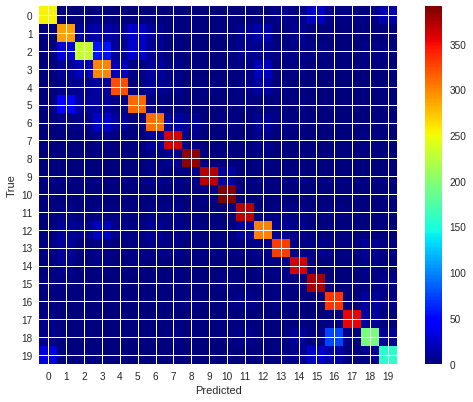

BernoulliNB 's Accuracy = 77.111 %



BernoulliNB 's Confusion Matrix


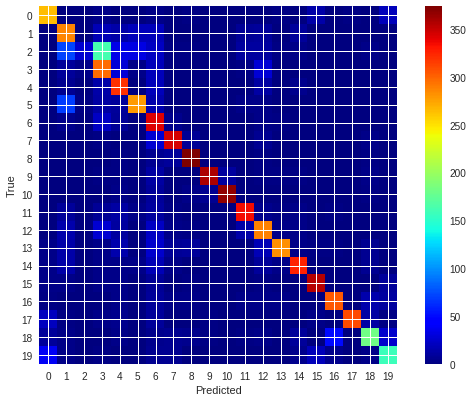

CPU times: user 2.42 s, sys: 1.52 s, total: 3.93 s
Wall time: 2.23 s


In [25]:
%%time
train_and_test()

In [16]:
%load_ext version_information
%version_information numpy, matplotlib, sklearn

Software versions
Python 3.6.2 64bit [GCC 4.8.2 20140120 (Red Hat 4.8.2-15)]
IPython 6.1.0
OS Linux 4.4.0 53 generic x86_64 with debian stretch sid
numpy 1.12.1
matplotlib 2.0.2
sklearn 0.19.0
Sun Sep 24 13:57:04 2017 CDT